In [1]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
import json

In [2]:
network = {}

In [3]:
with open("Railway.csv") as f:

    prev_train = None
    prev_station = None

    for line in f:
        train, st_no, st_id, date, arr_time, dep_time, stay_time, mileage, lat, lon = line.split(",")
        lat = float(lat)
        lon = float(lon)

        if train != prev_train:
            prev_station = None
            network[train] = []

        station = {
            "id": int(st_id),
            "name": f"Station {st_id}",
            "lat": lat,
            "lon": lon,
            "from": prev_station["lat"] if prev_station else None,
            "to": None,
        }

        network[train].append(station)

        if prev_station:
            prev_station["to"] = (lat, lon)

        prev_train = train
        prev_station = station

In [4]:
#create hashtable of station id and (lat,long) as key
station_id = {}
for train in network:
    for station in network[train]:

        station_id[(station['lat'], station['lon'])] = station['id']

In [5]:
import networkx as nx

# create an empty graph
G = nx.Graph()

# add nodes to the graph
for stations in network:
    for station in network[stations]:
        # print(station)
        #add note with the localisation for visualization
        G.add_node(station['id'], pos=(station['lon'], station['lat']))


# add edges to the graph
for stations in network:
    for station in network[stations]:
        from_node = station['id']
        to_node = None

        if type(station['to']) is tuple:
            # if the 'to' value is a tuple, create a new node
            to_node = station_id[station['to']]
            G.add_edge(from_node, to_node)
        else:
            # # if the 'to' value is an existing node, add an edge
            # to_node = station['to']
            # G.add_edge(from_node, to_node)
            continue

In [6]:
#get number of nodes
G.number_of_nodes()

2719

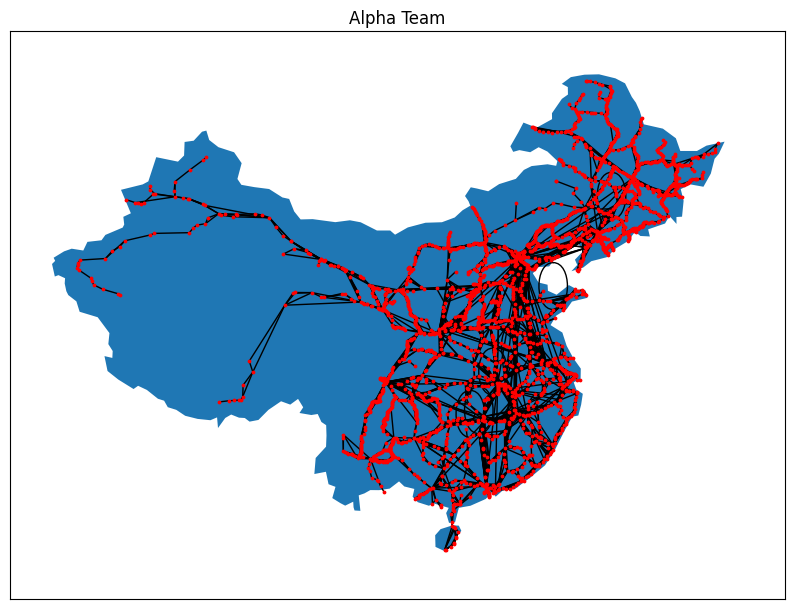

In [11]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

china=world[world['name'] == 'China']
china.plot(figsize=(10,10))
import matplotlib.pyplot as plt
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G,pos, with_labels=False, node_size=3, node_color='red')
#plot axes
plt.axis('on')
plt.title("Alpha Team")

#plot title
plt.show()